# Linear regression

## Code

### 1. Chuẩn bị dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/house_price.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Bỏ cột Id
cols_to_drop = ['Id']
df = df.drop(cols_to_drop, axis=1)

In [5]:
miss = df.isna().sum()
miss = miss[miss > 0]
print('Danh sách các cột thiếu dữ liệu:\n')
print(miss[:3])
print('\n\nSố lượng cột có dữ liệu thiếu:', len(miss))

Danh sách các cột thiếu dữ liệu:

LotFrontage     259
Alley          1369
MasVnrType        8
dtype: int64


Số lượng cột có dữ liệu thiếu: 19


#### 1.1 Loại bỏ dữ liệu thiếu

In [6]:
miss.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
df_simple = df.drop(miss.index, axis=1)

In [8]:
print('Dữ liệu còn thiếu:', np.sum(df_simple.isna().sum()))

Dữ liệu còn thiếu: 0


### 2. Encoding

In [9]:
obj_type_cols = [col for col in df_simple.columns if df_simple[col].dtypes == 'object']

#### 2.1 Encode kiểu object về kiểu số

In [10]:
from sklearn.preprocessing import LabelEncoder
cols = [
    'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 
    'Functional', 'LandSlope','LotShape', 'PavedDrive',
    'Street', 'CentralAir', 'MSSubClass', 'OverallCond'
]

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_simple[c].values)) 
    df_simple[c] = lbl.transform(list(df_simple[c].values))

# shape
print('Shape all_data: {}'.format(df_simple.shape))

Shape all_data: (1460, 61)


#### 2.2 Encode 1 hot

In [11]:
df_simple_1hot = pd.get_dummies(df_simple)

In [12]:
df_simple_1hot.shape

(1460, 187)

### Chuẩn bị thư viện

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p

In [14]:
y = df_simple_1hot['SalePrice'].to_numpy()
X = df_simple_1hot.drop(['SalePrice'], axis=1).to_numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [16]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.9227208815112585

In [17]:
LR.score(X_test, y_test)

0.8190610039722761

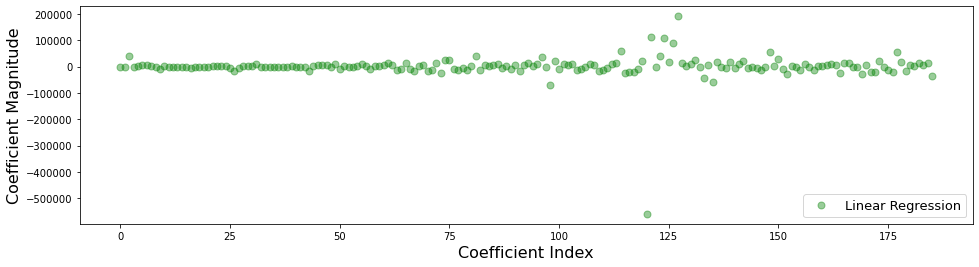

In [18]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot(LR.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [19]:
y_pred = LR.predict(X_test)

In [20]:
print(y_test[21], y_pred[21])

135000 112411.58521651139


In [21]:
from sklearn.metrics import r2_score

In [22]:
df.shape[1]

80

In [23]:
r2 = r2_score(y_test, y_pred)
r2

0.8190610039722761

In [24]:
adjusted_R2 = 1-(1-r2**2)*(len(X_train-1))/(len(X_train-df.shape[1]-2))

In [25]:
adjusted_R2

0.6708609282280729

### Thử các hàm regularization + linear regression

In [99]:
LR_lasso = Lasso(alpha=1,max_iter=10000)
LR_lasso.fit(X_train, y_train)
print('train score lasso model', LR_lasso.score(X_train, y_train))
print('test score lasso model',LR_lasso.score(X_test,y_test))

train score lasso model 0.9227123201560381
test score lasso model 0.8235456813589628


In [113]:
LR_ridge = Ridge(alpha=0.8,max_iter=10000)
LR_ridge.fit(X_train, y_train)
print('train score ridge model', LR_ridge.score(X_train, y_train))
print('test score ridge model',LR_ridge.score(X_test,y_test))

train score ridge model 0.9111145134451741
test score ridge model 0.8399922427395273


In [118]:
LR_elastic = ElasticNet(alpha=0.8,max_iter=50000)
LR_elastic.fit(X_train, y_train)
print('train score ridge model', LR_elastic.score(X_train, y_train))
print('test score ridge model',LR_elastic.score(X_test,y_test))

train score ridge model 0.8291712691647409
test score ridge model 0.8335036221589393


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625914238208.8081, tolerance: 675038764.4340388
  model = cd_fast.enet_coordinate_descent(


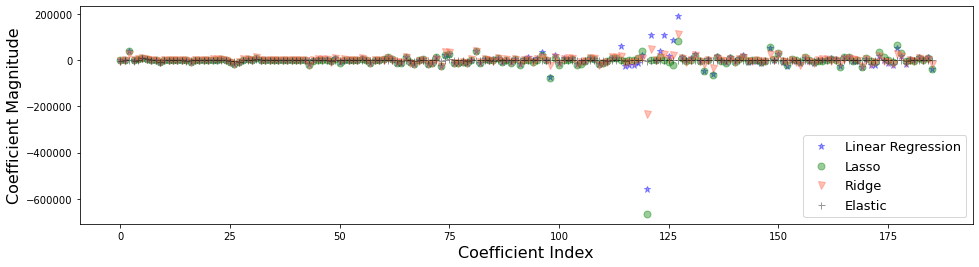

In [127]:
fig, ax1 = plt.subplots(1, figsize=(16, 4))
ax1.plot(LR.coef_, alpha=0.4, linestyle='none', marker='*', markersize=7, color='blue', label='Linear Regression')
ax1.plot(LR_lasso.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Lasso')
ax1.plot(LR_ridge.coef_, alpha=0.4, linestyle='none', marker='v', markersize=7, color='tomato', label='Ridge')
ax1.plot(LR_elastic.coef_, alpha=0.4, linestyle='none', marker='+', markersize=7, color='black', label='Elastic')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

+ => Coef of elastic model is nearly equal 0 for all input parameters
+ => Lasso punished starker for those outliers than ridge model